Importation des bibliothèques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler

Chargement et exploration des données

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


Partie 1: Prétraitement des données

1-Gestion des doublons

In [1]:
# 1- Detection des doublons
doublons_avant = df.duplicated().sum()
print("Nombre de doublons:", doublons_avant)

NameError: name 'df' is not defined

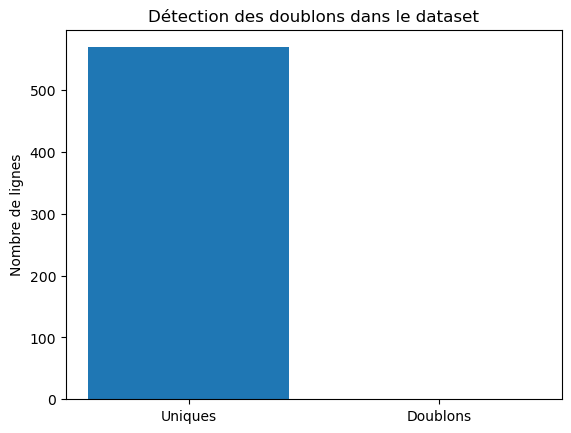

In [9]:
# Nombre de doublons
doublons_avant = df.duplicated().sum()
uniques = len(df) - doublons_avant
# Données
labels = ['Uniques', 'Doublons']
values = [uniques, doublons_avant]

# Tracé
plt.bar(labels, values)
plt.title('Détection des doublons dans le dataset')
plt.ylabel('Nombre de lignes')
plt.show()

2-Gestion des valeurs manquantes

In [10]:
print("Valeurs manquantes:", df.isnull().sum())

Valeurs manquantes: id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_w

C:\Users\omran\AppData\Local\Temp\ipykernel_2104\3225642505.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")


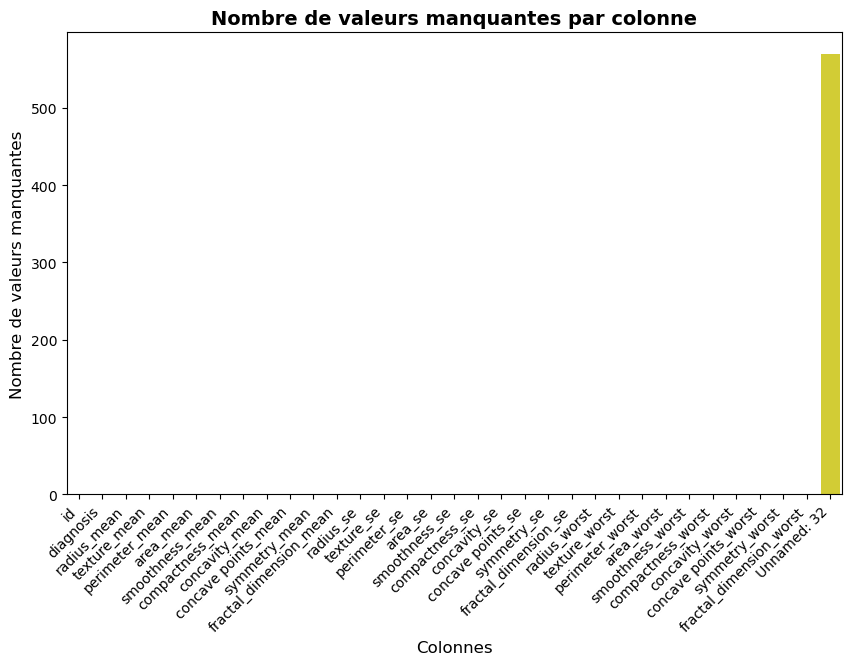

In [11]:
# Comptage des valeurs manquantes
missing_values = df.isnull().sum()

# Préparation du graphique
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")

plt.title("Nombre de valeurs manquantes par colonne",
          fontsize=14, fontweight="bold")
plt.ylabel("Nombre de valeurs manquantes", fontsize=12)
plt.xlabel("Colonnes", fontsize=12)
plt.xticks(rotation=45, ha='right')  # rotation des labels pour lisibilité
plt.show()

In [12]:
# 1. Suppression de la colonne
df = df.drop(columns=['Unnamed: 32'])

🔍 Valeurs manquantes après nettoyage :

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


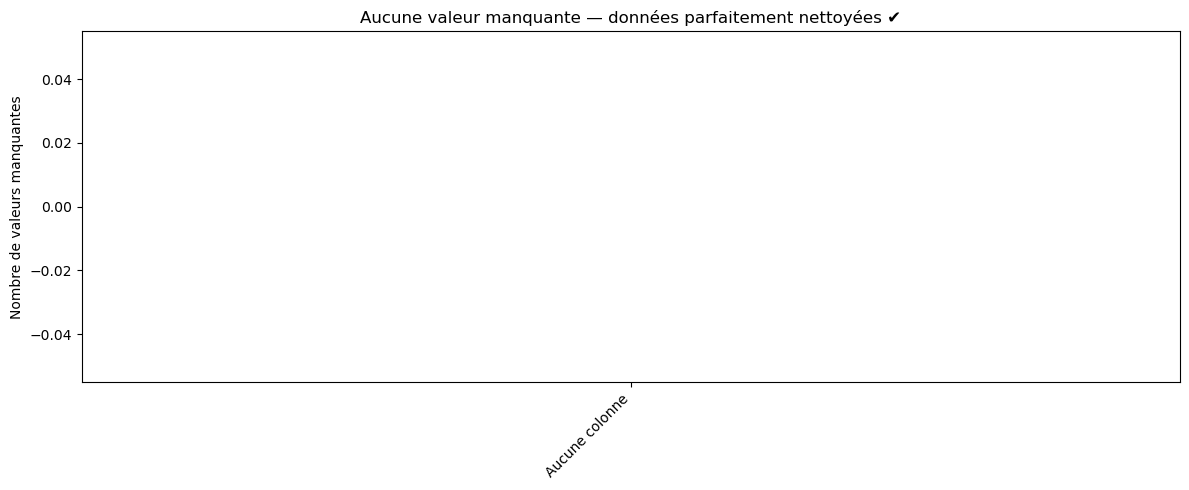

In [13]:
# 2. Vérification des valeurs manquantes après nettoyage
missing_values = df.isnull().sum()

print("🔍 Valeurs manquantes après nettoyage :\n")
print(missing_values)

# 3. Visualisation graphique améliorée
mv = missing_values[missing_values > 0]   # Affiche uniquement les colonnes contenant des valeurs manquantes

plt.figure(figsize=(12, 5))

if mv.empty:
    plt.bar(['Aucune colonne'], [0])
    plt.title('Aucune valeur manquante — données parfaitement nettoyées ✔')
    plt.ylabel('Nombre de valeurs manquantes')
else:
    mv.sort_values(ascending=False).plot(kind='bar')
    plt.title('Valeurs manquantes par colonne après nettoyage')
    plt.xlabel('Colonnes')
    plt.ylabel('Nombre de valeurs manquantes')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

3-Gestion des valeurs abberrantes


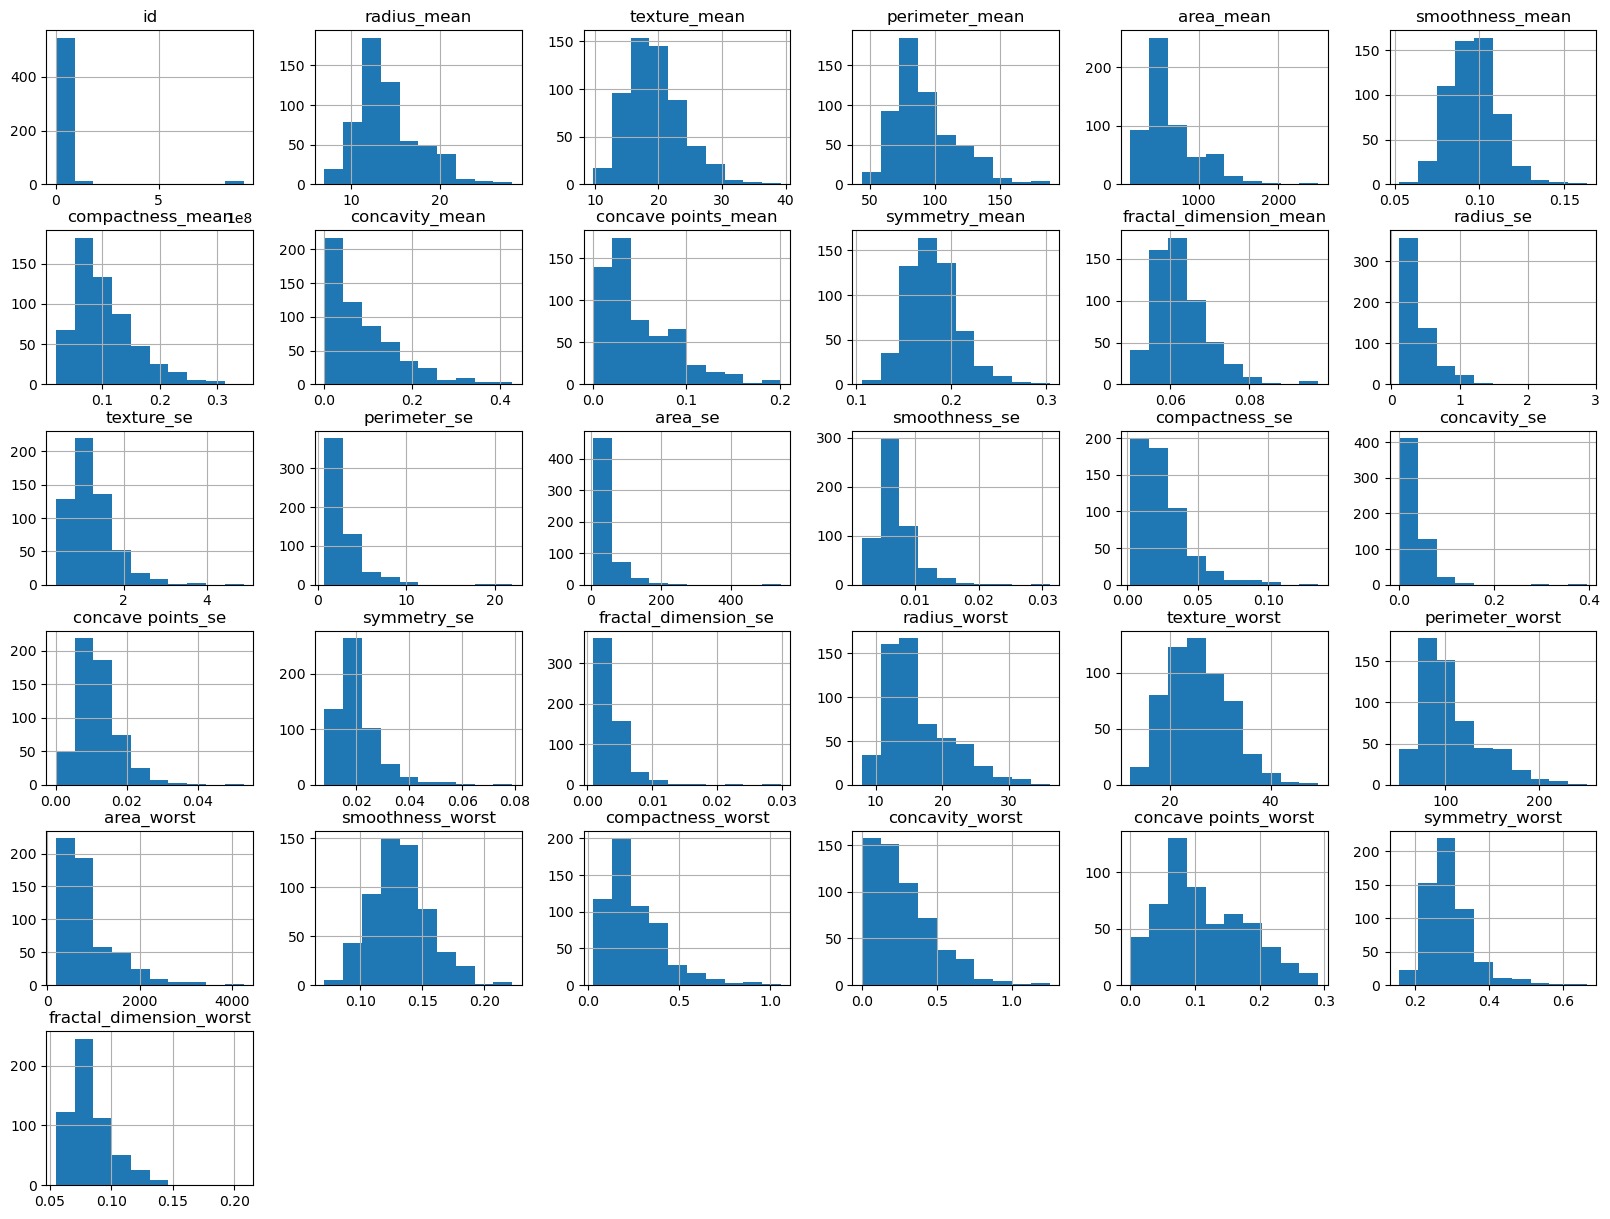

In [14]:
# Displying Histograms
df.hist(figsize=(20, 15))
plt.show()

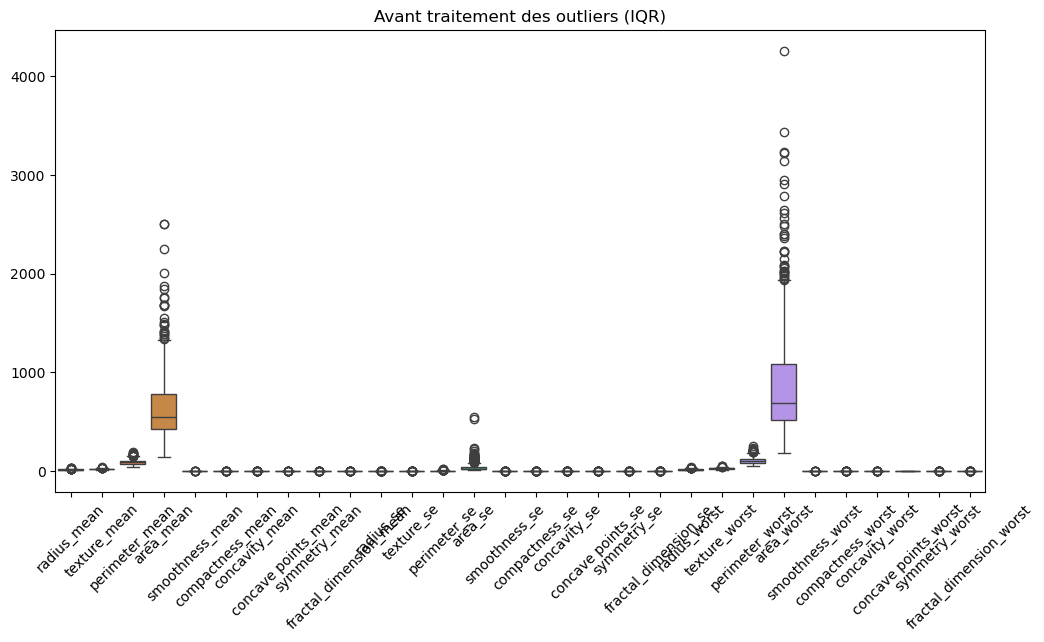

In [15]:
# 1. Données originales
# =========================
num_cols = df.select_dtypes(include=['float64']).columns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols])
plt.title("Avant traitement des outliers (IQR)")
plt.xticks(rotation=45)
plt.show()

In [16]:
# Traitement des valeurs abberrantes
df_clean = df.copy()

for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping (remplacement des valeurs extrêmes)
    df_clean[col] = np.where(df_clean[col] < lower_bound, lower_bound, df_clean[col])
    df_clean[col] = np.where(df_clean[col] > upper_bound, upper_bound, df_clean[col])

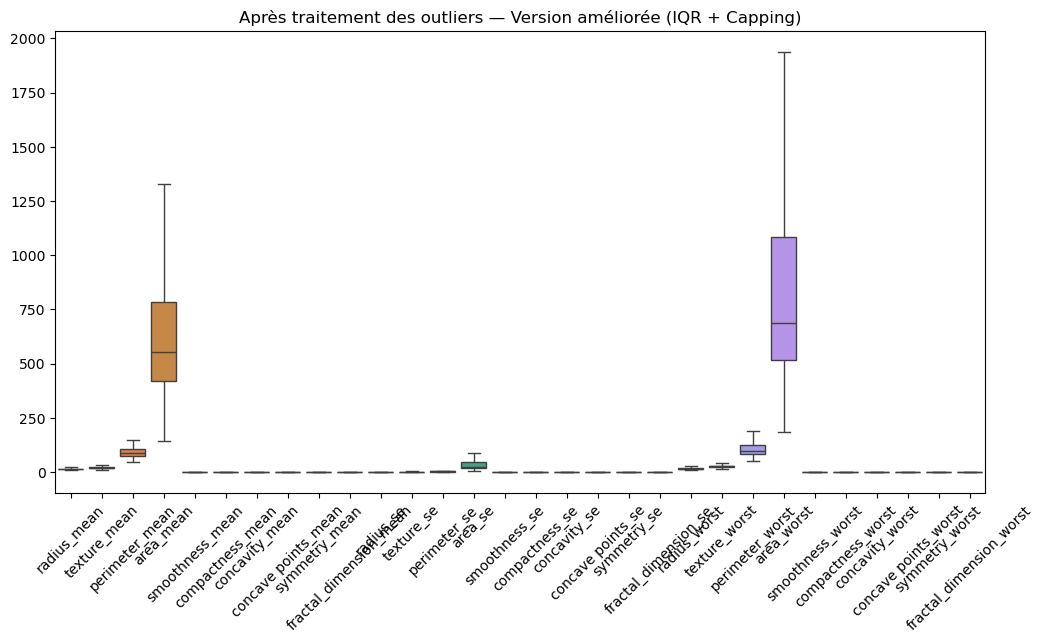

In [17]:
# 3. Données nettoyées
# =========================
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean[num_cols])
plt.title("Après traitement des outliers — Version améliorée (IQR + Capping)")
plt.xticks(rotation=45)
plt.show()


Partie 2: Transformation de données

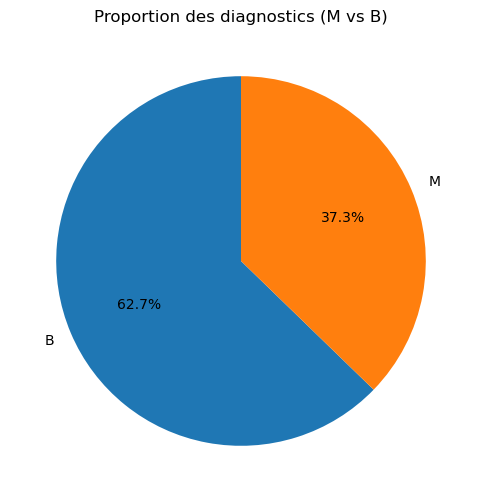

In [18]:
df['diagnosis'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    figsize=(6, 6)
)
plt.title("Proportion des diagnostics (M vs B)")
plt.ylabel("")   # Pour enlever l'étiquette inutile
plt.show()


 Encodage de diagnosis

In [19]:
# Copie du dataset nettoyé
df_final = df_clean.copy()

# Encodage du diagnostic (M = 1, B = 0)
df_final['diagnosis'] = df_final['diagnosis'].map({'M': 1, 'B': 0})



C:\Users\omran\AppData\Local\Temp\ipykernel_2104\4190523415.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df_final, palette=['green','red'])


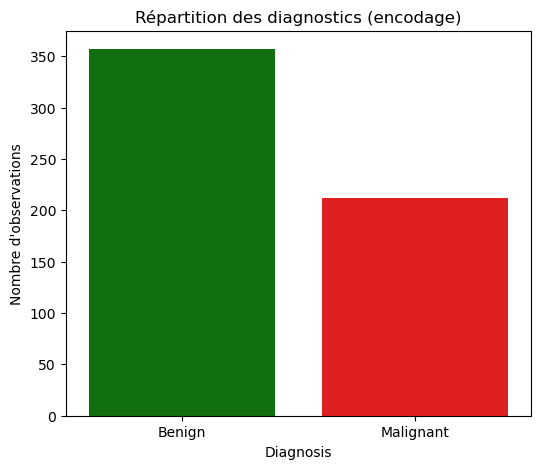

In [20]:

plt.figure(figsize=(6, 5))
sns.countplot(x='diagnosis', data=df_final, palette=['green','red'])
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.title("Répartition des diagnostics (encodage)")
plt.xlabel("Diagnosis")
plt.ylabel("Nombre d'observations")
plt.show()


Partie 3: Sélection des caractéristiques

 1.Sélection des colonnes numériques 

In [21]:
df_num = df_final.select_dtypes(include=['int64', 'float64'])
print("Colonnes numériques :", df_num.columns.tolist())

Colonnes numériques : ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num)

df_scaled = pd.DataFrame(X_scaled, columns=df_num.columns)
print("Standardisation terminée ✔")
print(df_scaled.head())

Standardisation terminée ✔
         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0 -0.236405   1.297676     1.176800     -2.121200        1.357375   1.184085   
1 -0.236403   1.297676     1.949929     -0.354875        1.795991   2.249396   
2  0.431741   1.297676     1.686226      0.476899        1.670052   1.846217   
3  0.432121   1.297676    -0.791983      0.268955       -0.606410  -0.831485   
4  0.432201   1.297676     1.866023     -1.174698        1.891531   2.154338   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         1.618861          2.541404        2.647422             2.620973   
1        -0.842995         -0.498189       -0.000497             0.574944   
2         0.975239          1.148680        1.496076             2.110330   
3         2.737521          2.541404        2.091997             1.506601   
4         0.295047          0.599453        1.504202             1.482665   

   ...  radius_worst  texture

 3. Matrice de corrélation

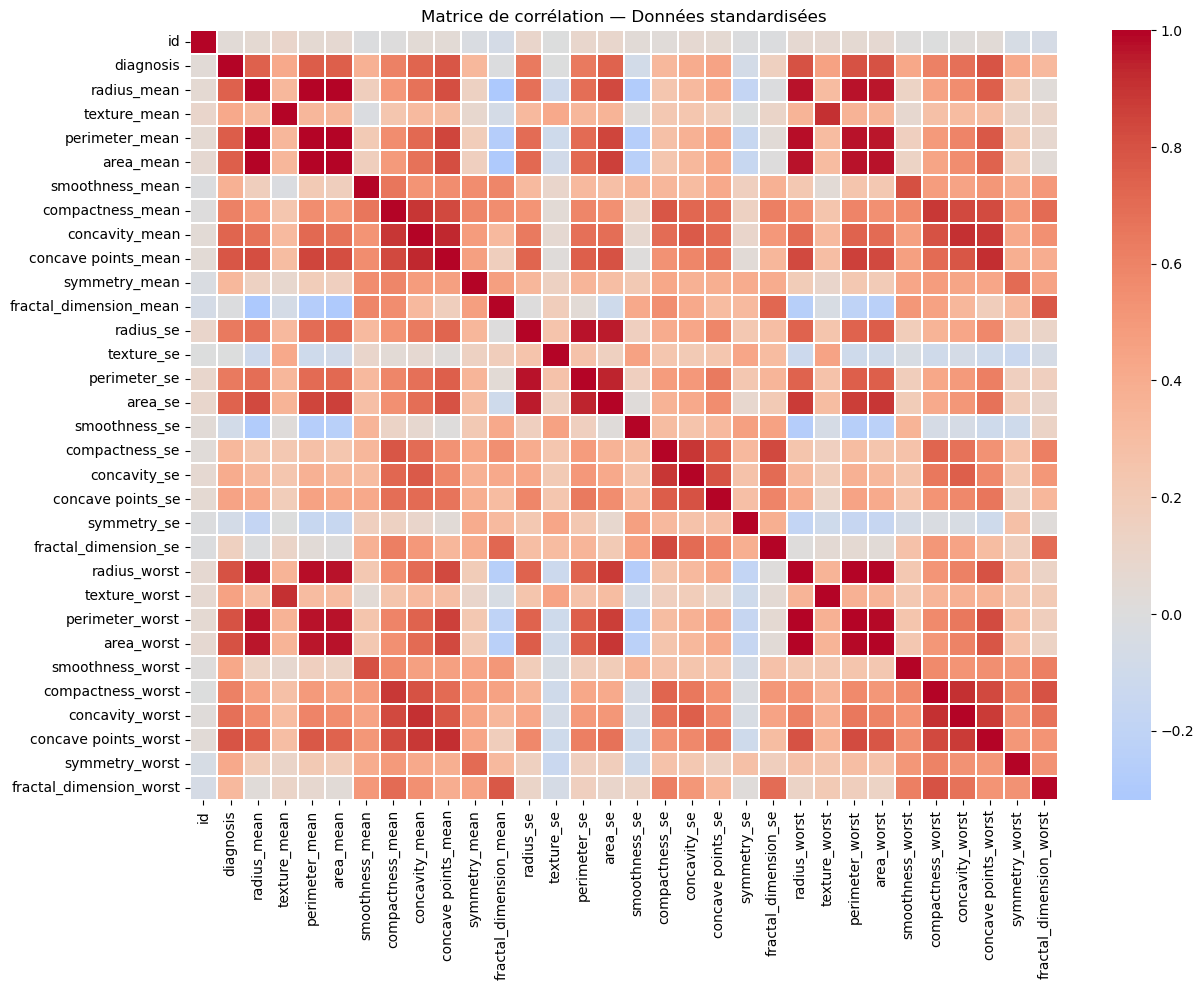

In [23]:
plt.figure(figsize=(14, 10))
sns.heatmap(df_scaled.corr(),
            cmap='coolwarm',
            center=0,
            annot=False,
            linewidths=0.3)
plt.title("Matrice de corrélation — Données standardisées")
plt.show()

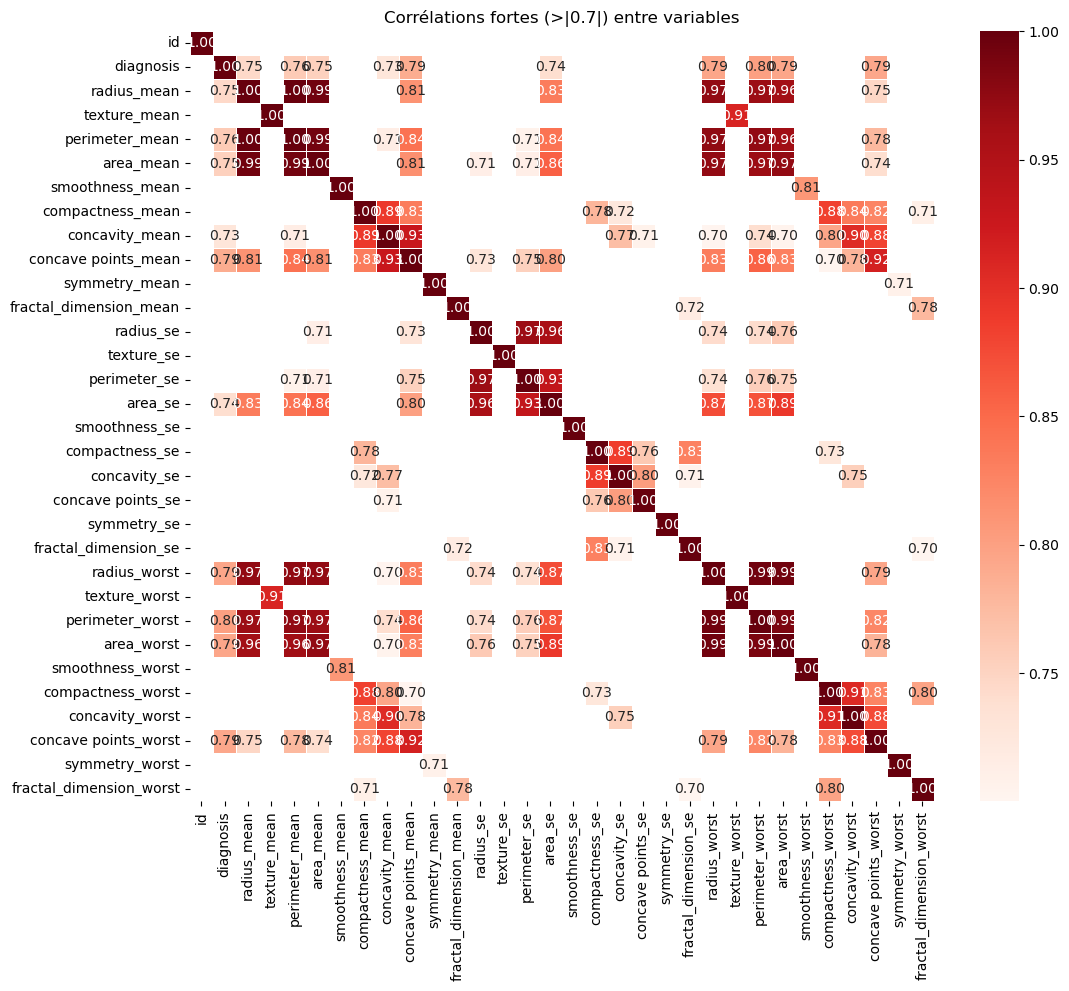

In [24]:

# Corrélation absolue
corr = df_scaled.corr().abs()

# Masque les petites corrélations (< 0.7)
strong_corr = corr[corr > 0.7]

plt.figure(figsize=(12, 10))
sns.heatmap(strong_corr, annot=True, cmap='Reds', fmt=".2f", linewidths=0.5)
plt.title("Corrélations fortes (>|0.7|) entre variables")
plt.show()


Créer un DataFrame avec les caractéristiques sélectionnées

In [25]:
# 5️⃣ Sélection automatique des colonnes fortement corrélées
selected_cols = set()
threshold = 0.96

for col in corr.columns:
    high_corr_cols = corr.index[(corr[col] > threshold) & (corr.index != col)].tolist()
    if high_corr_cols:
        selected_cols.add(col)

selected_cols = list(selected_cols)
print("Colonnes fortement corrélées :", selected_cols)

Colonnes fortement corrélées : ['perimeter_mean', 'perimeter_worst', 'radius_se', 'radius_worst', 'radius_mean', 'perimeter_se', 'area_mean', 'area_worst']


In [26]:
# 6️⃣ Colonnes retenues pour l'ACP = colonnes numériques - colonnes corrélées (pour éviter la redondance)
cols_acp = [c for c in df_num.columns if c not in selected_cols]
print(f"Colonnes retenues pour ACP ({len(cols_acp)}) :", cols_acp)

Colonnes retenues pour ACP (24) : ['id', 'diagnosis', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'texture_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


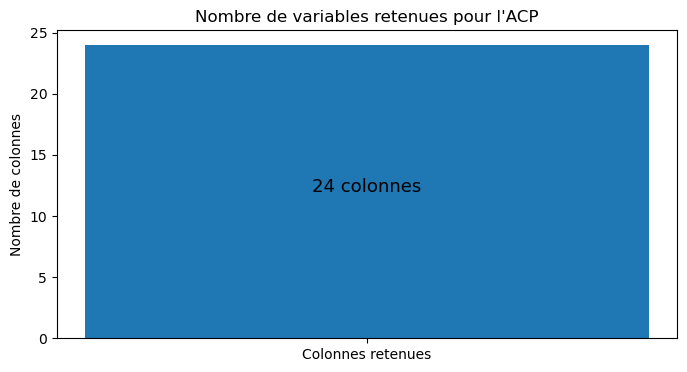

In [27]:
# 7️⃣ Affichage du nombre de colonnes retenues (graphique)
plt.figure(figsize=(8, 4))
plt.bar(['Colonnes retenues'], [len(cols_acp)], width=0.4)

plt.text(0, len(cols_acp) / 2,
         f'{len(cols_acp)} colonnes',
         ha='center',
         fontsize=13)

plt.title("Nombre de variables retenues pour l'ACP")
plt.ylabel("Nombre de colonnes")
plt.show()

Partie4 : Application de l'ACP

In [28]:
# PCA sur les colonnes retenues
pca = PCA(n_components=len(cols_acp))
pca_components = pca.fit_transform(df_scaled[cols_acp])

# Variance expliquée
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

In [29]:
eig = pd.DataFrame({
    "Dimension": ["Dim" + str(i+1) for i in range(len(pca.explained_variance_))],
    "Valeur propre": np.round(pca.explained_variance_, 2),
    "% variance expliquée": np.round(explained_variance * 100, 2),
    "% variance cumulée": np.round(cumulative_variance * 100, 2)
})

print("Tableau des valeurs propres et variances expliquées :\n")
print(eig)

Tableau des valeurs propres et variances expliquées :

   Dimension  Valeur propre  % variance expliquée  % variance cumulée
0       Dim1          10.61                 44.12               44.12
1       Dim2           3.16                 13.16               57.27
2       Dim3           2.42                 10.05               67.33
3       Dim4           1.73                  7.21               74.54
4       Dim5           1.45                  6.04               80.58
5       Dim6           1.17                  4.88               85.46
6       Dim7           0.98                  4.06               89.52
7       Dim8           0.45                  1.89               91.41
8       Dim9           0.41                  1.69               93.10
9      Dim10           0.31                  1.31               94.41
10     Dim11           0.28                  1.15               95.56
11     Dim12           0.23                  0.95               96.51
12     Dim13           0.18        

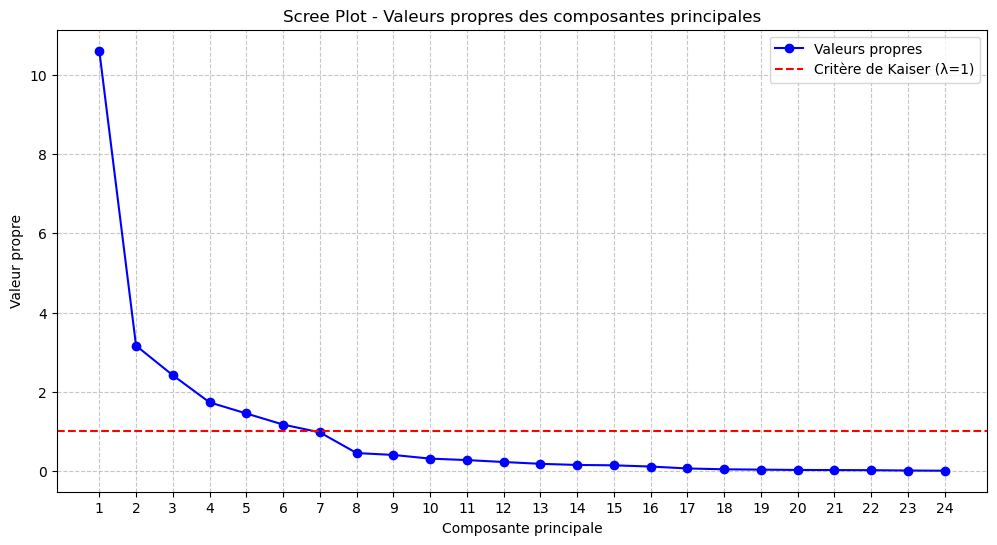

In [30]:
eigenvalues = pca.explained_variance_

plt.figure(figsize=(12, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', color='b', label='Valeurs propres')
plt.axhline(y=1, color='r', linestyle='--', label='Critère de Kaiser (λ=1)')
plt.title("Scree Plot - Valeurs propres des composantes principales")
plt.xlabel("Composante principale")
plt.ylabel("Valeur propre")
plt.xticks(range(1, len(eigenvalues) + 1))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Étape 3 : Heatmap des contributions des variables

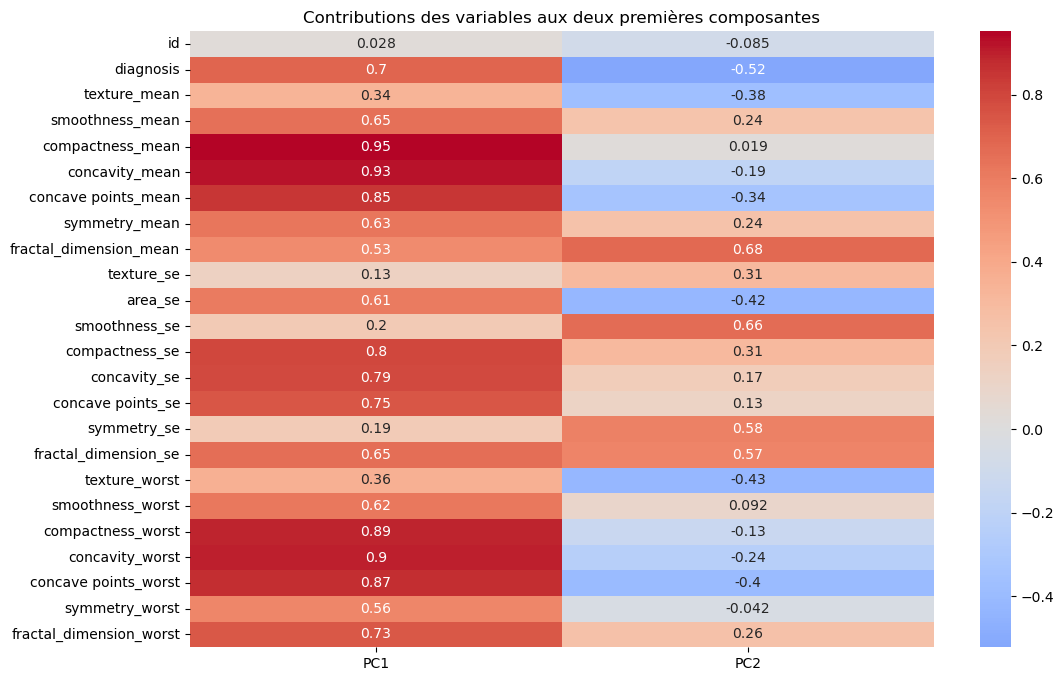

In [31]:
# Calcul des loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Créer un DataFrame pour les 2 premières composantes
loading_df = pd.DataFrame(loadings[:, :2], columns=['PC1', 'PC2'], index=cols_acp)

plt.figure(figsize=(12, 8))
sns.heatmap(loading_df, annot=True, cmap='coolwarm', center=0)
plt.title("Contributions des variables aux deux premières composantes")
plt.show()


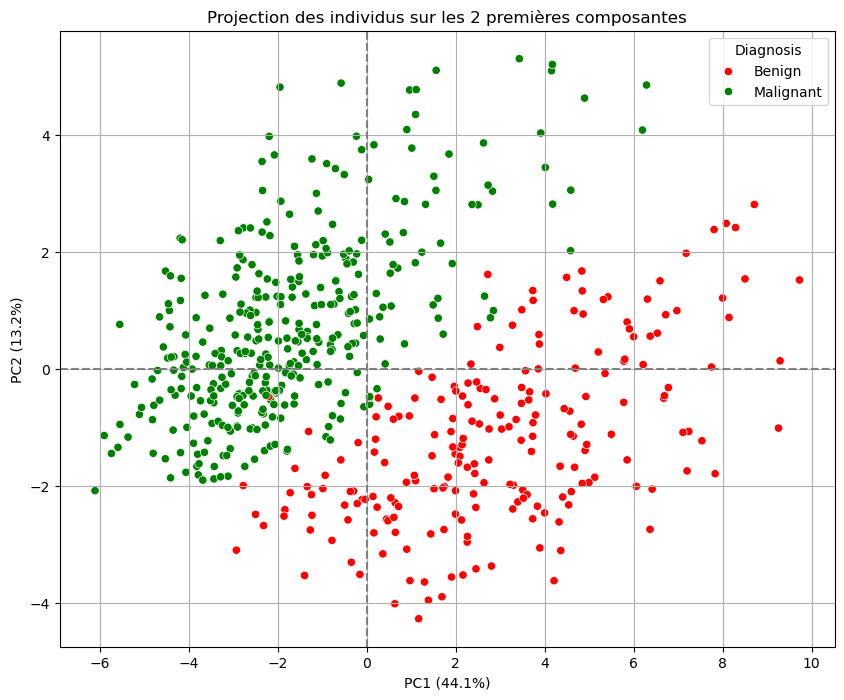

In [32]:
# % variance expliquée pour PC1 et PC2
pc1_var = explained_variance[0] * 100
pc2_var = explained_variance[1] * 100

# DataFrame des 2 premières composantes + diagnosis
pca_df = pd.DataFrame(pca_components[:, :2], columns=['PC1', 'PC2'])
pca_df['diagnosis'] = df_final['diagnosis']

plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='diagnosis', palette=['green', 'red'])
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.xlabel(f"PC1 ({pc1_var:.1f}%)")
plt.ylabel(f"PC2 ({pc2_var:.1f}%)")
plt.title("Projection des individus sur les 2 premières composantes")
plt.legend(title='Diagnosis', labels=['Benign', 'Malignant'])
plt.grid(True)
plt.show()

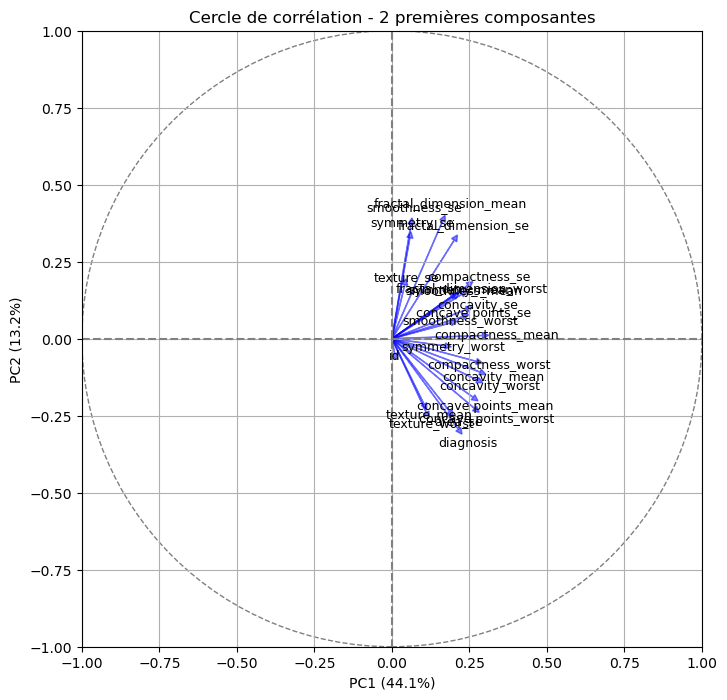

In [33]:
pcs = pca.components_[:2, :]  # PC1 & PC2
n_vars = pcs.shape[1]

plt.figure(figsize=(8, 8))
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

for i in range(n_vars):
    x = pcs[0, i]
    y = pcs[1, i]
    plt.arrow(0, 0, x, y, color='b', alpha=0.5, head_width=0.02, head_length=0.02)
    plt.text(x*1.15, y*1.15, cols_acp[i], fontsize=9, ha='center', va='center')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel(f"PC1 ({pc1_var:.1f}%)")
plt.ylabel(f"PC2 ({pc2_var:.1f}%)")
plt.title("Cercle de corrélation - 2 premières composantes")
plt.grid(True)
plt.show()

In [34]:
df_final.to_excel("donnees_nettoyees.xlsx", index=False)
print("Export terminé → donnees_nettoyees.xlsx")

Export terminé → donnees_nettoyees.xlsx
